# Questão 1

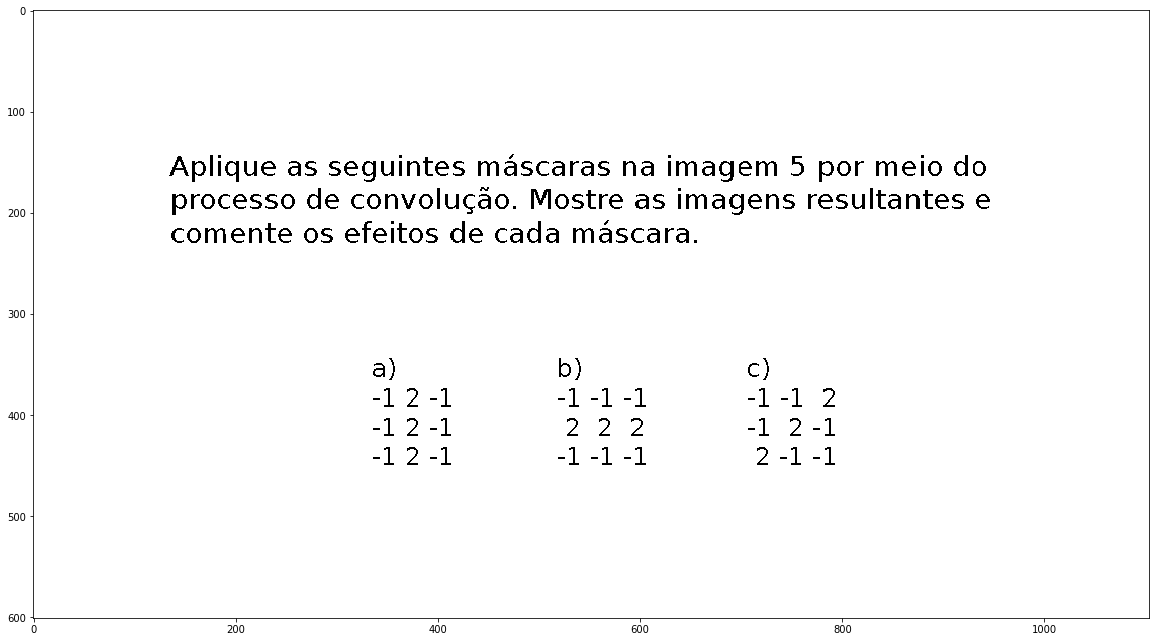

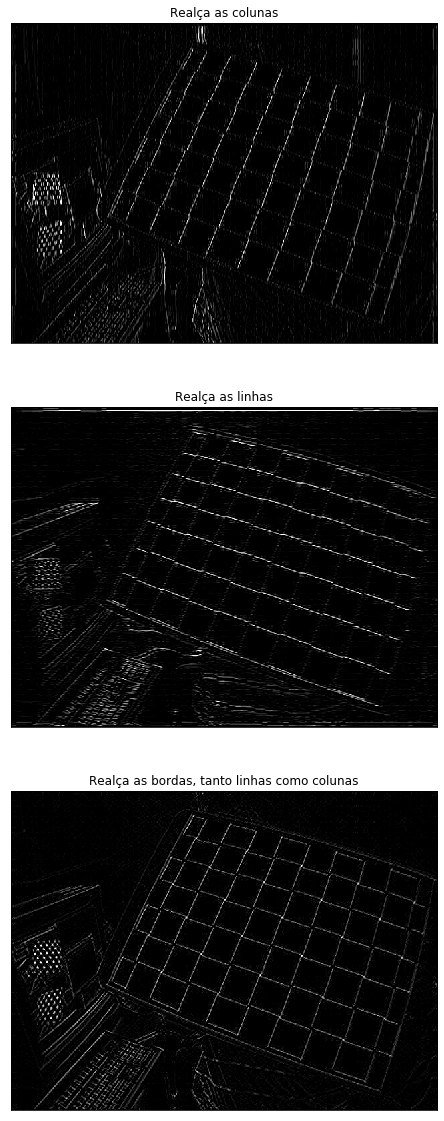

True

In [2]:
# Questão 1
# Combine as imagens 1a e 1b e resolva a questão que aparece na imagem resultante.

import cv2
import numpy as np
import matplotlib.pyplot as plt

img1 = cv2.imread('1a.bmp')
img2 = cv2.imread('1b.bmp')

imgResult = cv2.bitwise_and(img1, img2)
plt.figure(figsize=[20,20])
plt.imshow(imgResult);

kernelA = np.float32([[-1,2,-1],[-1,2,-1],[-1,2,-1]])
kernelB = np.float32([[-1,-1,-1],[2,2,2],[-1,-1,-1]])
kernelC = np.float32([[-1,-1,2],[-1,2,-1],[2,-1,-1]])

img5 = cv2.imread('5.jpg')

customA = cv2.filter2D(img5, -1, kernelA)
customB = cv2.filter2D(img5, -1, kernelB)
customC = cv2.filter2D(img5, -1, kernelC)

plt.figure(figsize=[20,20])
plt.subplot(311),plt.imshow(customA),plt.title('Realça as colunas')
plt.xticks([]), plt.yticks([])
plt.subplot(312),plt.imshow(customB),plt.title('Realça as linhas')
plt.xticks([]), plt.yticks([])
plt.subplot(313),plt.imshow(customC),plt.title('Realça as bordas, tanto linhas como colunas')
plt.xticks([]), plt.yticks([])
plt.show()


cv2.imwrite("Q1_Combinacao_a_b.jpg", imgResult)
cv2.imwrite("Q1_Mascara_a.jpg", customA)
cv2.imwrite("Q1_Mascara_b.jpg", customB)
cv2.imwrite("Q1_Mascara_c.jpg", customC)


# A mascara A realça as colunas da imagem
# A mascara B realça as linhas da imagem
# A mascara C realça tanto as linhas como as colunas

# Questão 2

In [312]:
# Questão 2
#  Escolha e aplique uma tranformação gamma que resulte em uma imagem 2 mais amarelada. Indique
# os parâmetros escolhidos e os passos realizados

img2 = cv2.imread('2.jpg')
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)

# Foi feito um split para separar os canais
imgB, imgG, imgR = cv2.split(img2)

# Cada canal foi feito um ganho diferente escolhido de forma manual empírica

# Canal R foi dado um ganho com gamma = 5
imgR = np.array(255*(imgR/255)**5,dtype='uint8')
# Canal G foi dado um ganho com gamma = 0.7
imgG = np.array(255*(imgG/255)**0.7,dtype='uint8')
# Canal B foi dado um ganho com gamma = 0.05
imgB = np.array(255*(imgB/255)**0.05,dtype='uint8')

# Após o ganho foi feito um merge para poder juntar os canais e formar a imagem final
imgAmarelada = cv2.merge((imgR, imgG, imgB))


# !!!!! AVISO !!!!! 
# A imagem mostrada na função plt.imshow esta azulada, 
# mas quando a imagem é salva na função cv2.imwrite ela fica amarelada

# plt.figure(figsize=[20,20])
# plt.subplot(121),plt.imshow(img2),plt.title('Original')
# plt.xticks([]), plt.yticks([])
# plt.subplot(122),plt.imshow(imgAmarelada),plt.title('Amarelada')
# plt.xticks([]), plt.yticks([])
# plt.show()

cv2.imwrite("Q2_amarelada.jpg", imgAmarelada)

True

# Questão 3

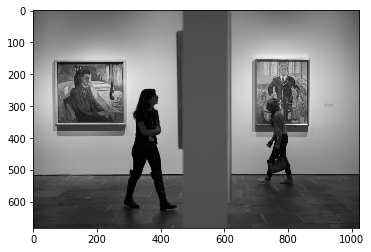

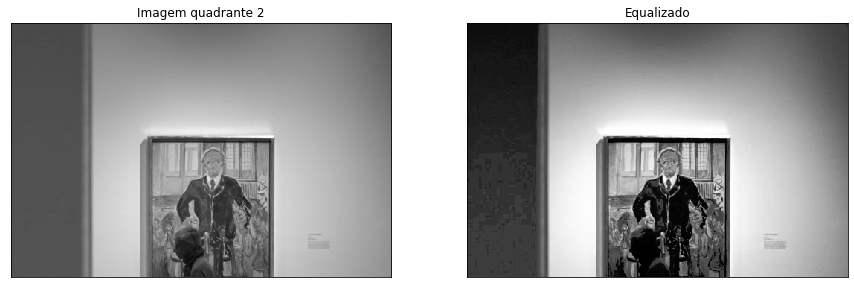

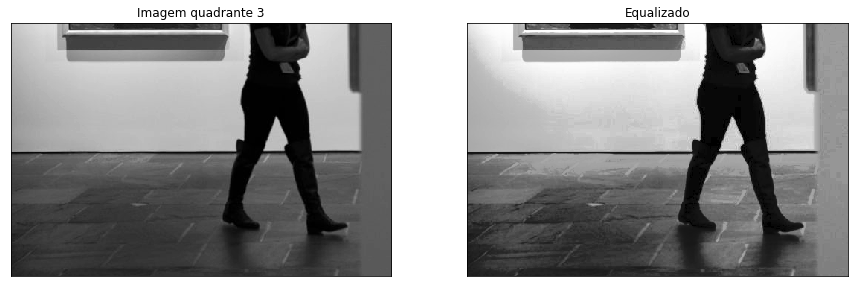

In [4]:
# Questão 3
# Considere a imagem 3 dividida em 4 quadrantes. Realize a equalização dos
# histogramas locais correspondentes aos quadrantes 2 e 3.

import cv2
import numpy as np
import matplotlib.pyplot as plt

img3 = cv2.imread('3.jpg', 0)
plt.imshow(img3, 'gray');

# img3.shape
# Imagem tem 683 por 1024
# Pegando a metade para dividir nos quadrantes fica arredondando 342 por 512

img3Quadrante2 = img3[:342 , 512:]
im_eq_quad2 = cv2.equalizeHist(img3Quadrante2)

plt.figure(figsize=[15,15])
plt.subplot(121),plt.imshow(img3Quadrante2, 'gray'),plt.title('Imagem quadrante 2')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(im_eq_quad2, 'gray'),plt.title('Equalizado')
plt.xticks([]), plt.yticks([])
plt.show()

img3Quadrante3 = img3[342: , :512]
im_eq_quad3 = cv2.equalizeHist(img3Quadrante3)

plt.figure(figsize=[15,15])
plt.subplot(121),plt.imshow(img3Quadrante3, 'gray'),plt.title('Imagem quadrante 3')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(im_eq_quad3, 'gray'),plt.title('Equalizado')
plt.xticks([]), plt.yticks([])
plt.show()


cv2.imwrite("Q3_Quadrante2.jpg", img3Quadrante2)
cv2.imwrite("Q3_Quadrante2_Equalizado.jpg", im_eq_quad2)
cv2.imwrite("Q3_Quadrante3.jpg", img3Quadrante3)
cv2.imwrite("Q3_Quadrante3_Equalizado.jpg", im_eq_quad3)

# Questão 4

In [924]:
# Questão 4
# Mostre como ficaria a imagem 4 caso as cores R,G e B fossem codificadas com apenas 4 bits cada.

# cv2.imwrite("Q2_.jpg", img)

import cv2
import numpy as np
import matplotlib.pyplot as plt

img4 = cv2.imread('4.jpg')
img4 = cv2.cvtColor(img4, cv2.COLOR_BGR2RGB)

valores4bits = np.zeros(256)
for i in range(0, 256):
    valores4bits[i] = int(i/16)
    
r, g, b = cv2.split(img4)

newR = cv2.LUT(r, valores4bits)
newG = cv2.LUT(g, valores4bits)
newB = cv2.LUT(b, valores4bits)

new = cv2.merge((newR, newG, newB))

plt.hist(new.ravel(), 256, [0,256]);

normalized_image = cv2.normalize(new,None,0,256,cv2.NORM_MINMAX)

plt.hist(normalized_image.ravel(), 256, [0,256]);

cv2.imwrite("Q4_Imagem4bits.jpg", new)
cv2.imwrite("Q4_Imagem4bitsNormalizada.jpg", normalized_image)

# Questão 6

In [875]:
# Questão 6 
#  Faça a coloração da imagem 6 de forma que o resultado final seja uma imagem colorida da bandeira
# do Brasil

img6 = cv2.imread('6.jpeg')

plt.hist(img6.ravel(), 256, [0,256]);

imgFinal = img6.copy()

# azul
imgFinal[img6[:,:,0] < 80,0] = 0
imgFinal[img6[:,:,1] < 80,1] = 0
imgFinal[img6[:,:,2] < 80,2] = 100

# verde 
imgFinal[(img6[:,:,0] < 110) & (img6[:,:,0] > 80),0] = 0
imgFinal[(img6[:,:,0] < 110) & (img6[:,:,0] > 80),1] = 100
imgFinal[(img6[:,:,0] < 110) & (img6[:,:,0] > 80),2] = 0

# amarelo
imgFinal[(img6[:,:,0] < 240) & (img6[:,:,0] > 230),0] = 255
imgFinal[(img6[:,:,0] < 240) & (img6[:,:,0] > 230),1] = 255
imgFinal[(img6[:,:,0] < 240) & (img6[:,:,0] > 230),2] = 0

# branco
imgFinal[img6[:,:,0] > 240,0] = 255
imgFinal[img6[:,:,1] > 240,1] = 255
imgFinal[img6[:,:,2] > 240,2] = 255


plt.figure(figsize=[15,15])
plt.subplot(121), plt.imshow(imgFinal, 'gray')
plt.subplot(122), plt.imshow(img6, 'gray')
plt.show()

imgFinal = cv2.cvtColor(imgFinal, cv2.COLOR_BGR2RGB)
cv2.imwrite("Q6_bandeira_colorida.jpg", imgFinal)

# Questão 7

In [635]:
# Questão 7
# Utilizando como base as figuras 7a e 7b, forme o desenho de um “boneco palito” aplicando uma
# sequência de transformações geométricas e operações lógicas nas imagens, seguindo as regras abaixo.
# – A figura resultante deve ter um tamanho de 300x300.
# – Use cópias da figura 7b para os braços, pernas e tronco do boneco.
# – Não redimensione as imagens para criar o tronco e a cabeça.
# – Cada braço deve ter 75% do tamanho do tronco.
# – As pernas devem estar em um ângulo de 90º entre si e devem ter o dobro do tamanho dos braços.
# – Posicione o boneco no centro da imagem.


circulo = cv2.imread('7a.jpg',0)
barra = cv2.imread('7b.jpg',0)

# plt.figure(figsize=[15,15])
plt.subplot(121), plt.imshow(circulo, 'gray')
plt.subplot(122), plt.imshow(barra, 'gray')
plt.show()

width = barra.shape[1]
height = barra.shape[0]

# Imagem final
imgFinal = np.zeros((300,300), dtype=np.uint8)
imgFinal.fill(255)
# plt.imshow(cv2.cvtColor(imgFinal, cv2.COLOR_BGR2RGB));

print('imagens: ', circulo.shape, 'imagemFinal: ', imgFinal.shape)

# Rotacionando

rotacao90 = cv2.getRotationMatrix2D((50,50),90,1)
tronco = cv2.warpAffine(barra,rotacao30,(width,height), borderValue=255)
# plt.imshow(tronco, 'gray');

rotacao45 = cv2.getRotationMatrix2D((50,50),45,.75)
Lbraco = cv2.warpAffine(barra,rotacao45,(width,height), borderValue=255)
# plt.imshow(Lbraco, 'gray');

rotacaoM45 = cv2.getRotationMatrix2D((50,50),-45,.75)
Rbraco = cv2.warpAffine(barra,rotacaoM45,(width,height), borderValue=255)
plt.imshow(Rbraco, 'gray');


# Montando o boneco
# cabeça
imgFinal[0:100,100:200] = cv2.bitwise_and(imgFinal[0:100, 100:200], circulo)
# plt.imshow(cv2.cvtColor(imgFinal, cv2.COLOR_BGR2RGB));
# plt.imshow(imgFinal, 'gray');

# tronco
imgFinal[57:157, 100:200] = cv2.bitwise_and(imgFinal[57:157, 100:200], tronco)
# plt.imshow(imgFinal, 'gray');

# Lbraco
imgFinal[50:150, 80:180] = cv2.bitwise_and(imgFinal[50:150, 80:180], Lbraco)
# plt.imshow(imgFinal, 'gray');

# Rbraco
imgFinal[50:150, 120:220] = cv2.bitwise_and(imgFinal[50:150, 120:220], Rbraco)
# plt.imshow(imgFinal, 'gray');

# Lperna
imgFinal[120:220, 80:180] = cv2.bitwise_and(imgFinal[120:220, 80:180], Lbraco)
imgFinal[160:260, 40:140] = cv2.bitwise_and(imgFinal[160:260, 40:140], Lbraco)
# plt.imshow(imgFinal, 'gray');

# Rperna
imgFinal[120:220, 120:220] = cv2.bitwise_and(imgFinal[120:220, 120:220], Rbraco)
imgFinal[160:260, 160:260] = cv2.bitwise_and(imgFinal[160:260, 160:260], Rbraco)
plt.imshow(imgFinal, 'gray');


cv2.imwrite("Q7_Boneco.jpg", imgFinal)